In [2]:
# Import pandas to read in data
import numpy as np
import pandas as pd

# Import models and evaluation functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
#from sklearn import cross_validation
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Import vectorizers to turn text into numeric
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import plotting
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
# Read data using pandas
user_cols=['Reviewers_Name','Rating','Review_Magazine','Review','Date']
df = pd.read_csv("Homework3.txt",sep="\t",header=None,names=user_cols)
df['Rating'] = df['Rating'].replace(['fresh','rotten'], [1,0]) #set fresh as 1 and rotten as 0
df['Review']=df.Review.astype(str) #change review to 'string'

In [6]:
df

,Reviewers_Name,Rating,Review_Magazine,Review,Date
0,Josh Larsen,1,LarsenOnFilm,Martin Scorsese's Les Miserables.,"October 25, 2019"
1,Joshua Brown,0,London Review of Books,Gangs of New York is to Fernando Wood's Manhat...,"June 27, 2019"
2,PJ Nabarro,1,Patrick Nabarro,You simply have to applaud the magnitude and a...,"March 16, 2019"
3,Namrata Joshi,1,Outlook,One of the most provocative films from Hollywo...,"January 4, 2019"
4,Eileen Jones,0,The eXile,Gangs of New York is one of those haunting fai...,"October 31, 2018"
...,...,...,...,...,...
2084,Andrea Thompson,1,A Reel of One's Own,Parasite conjures up images of a creature whic...,"September 18, 2019"
2085,Oliver Whitney,1,GQ,An exhilarating rollercoaster ride that keeps ...,"September 17, 2019"
2086,Rene Sanchez,1,Cine Sin Fronteras,A masterpiece in storytelling. Parasite is a d...,"September 16, 2019"
2087,Alissa Wilkinson,1,Vox,"While it's hugely entertaining, Parasite is al...","September 13, 2019"


In [7]:
df.describe()

,Rating
count,2089.000000
mean,0.727142
std,0.445535
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df.shape

(2089, 5)

In [9]:
#drop N/A values so our model can run correctly
new_data=df.dropna()
new_data.shape

(2089, 5)

In [10]:
new_data.describe()

,Rating
count,2089.000000
mean,0.727142
std,0.445535
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


    Test a set of features

In [11]:
X_text = new_data['Review']
Y = new_data['Rating']

In [12]:
# Create a vectorizer that will track text as binary features
binary_vectorizer = CountVectorizer(binary=True)

# Let the vectorizer learn what tokens exist in the text data
binary_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = binary_vectorizer.transform(X_text)

In [13]:
#modeling
# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation

from sklearn.model_selection import cross_val_score
accs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average accuracy rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(accs), 3)))

Accuracy of our classifier is 0.681


/Users/baongocdinh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
# Create a vectorizer that will track text as binary features
tfidf_vectorizer = TfidfVectorizer()

# Let the vectorizer learn what tokens exist in the text data
tfidf_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = tfidf_vectorizer.transform(X_text)

# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation AUCs
aucs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(aucs), 3)))

Accuracy of our classifier is 0.725


/Users/baongocdinh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As we can see here, model accuracy increased by 3% due to using tfidf vectorizer. 

Removing stop words

In [15]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/baongocdinh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#removing stopwords to see if the model can perform better
user_cols=['Reviewers_Name','Rating','Review_Magazine','Review','Date']
df_2 = pd.read_csv("Homework3.txt",sep="\t",header=None,names=user_cols)
df_2['Rating'] = df_2['Rating'].replace(['fresh','rotten'], [1,0])
df_2['Review']=df_2.Review.astype(str)
df_2_clean=df_2.dropna()
#set fresh as 1 and rotten as 0

In [18]:
df_2_clean

,Reviewers_Name,Rating,Review_Magazine,Review,Date
0,Josh Larsen,1,LarsenOnFilm,Martin Scorsese's Les Miserables.,"October 25, 2019"
1,Joshua Brown,0,London Review of Books,Gangs of New York is to Fernando Wood's Manhat...,"June 27, 2019"
2,PJ Nabarro,1,Patrick Nabarro,You simply have to applaud the magnitude and a...,"March 16, 2019"
3,Namrata Joshi,1,Outlook,One of the most provocative films from Hollywo...,"January 4, 2019"
4,Eileen Jones,0,The eXile,Gangs of New York is one of those haunting fai...,"October 31, 2018"
...,...,...,...,...,...
2084,Andrea Thompson,1,A Reel of One's Own,Parasite conjures up images of a creature whic...,"September 18, 2019"
2085,Oliver Whitney,1,GQ,An exhilarating rollercoaster ride that keeps ...,"September 17, 2019"
2086,Rene Sanchez,1,Cine Sin Fronteras,A masterpiece in storytelling. Parasite is a d...,"September 16, 2019"
2087,Alissa Wilkinson,1,Vox,"While it's hugely entertaining, Parasite is al...","September 13, 2019"


In [19]:
df_2_clean['Review'] = df_2_clean.Review.str.replace("[^\w\s]", "").str.lower()
df_2_clean['Review'] = df_2_clean['Review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))


In [20]:
df_2_clean
#this is how the dataframe looks like without the stop words

,Reviewers_Name,Rating,Review_Magazine,Review,Date
0,Josh Larsen,1,LarsenOnFilm,martin scorseses les miserables,"October 25, 2019"
1,Joshua Brown,0,London Review of Books,gangs new york fernando woods manhattan fellin...,"June 27, 2019"
2,PJ Nabarro,1,Patrick Nabarro,simply applaud magnitude ambition scorseses vi...,"March 16, 2019"
3,Namrata Joshi,1,Outlook,one provocative films hollywood recent times,"January 4, 2019"
4,Eileen Jones,0,The eXile,gangs new york one haunting failures cant get ...,"October 31, 2018"
...,...,...,...,...,...
2084,Andrea Thompson,1,A Reel of One's Own,parasite conjures images creature takes victim...,"September 18, 2019"
2085,Oliver Whitney,1,GQ,exhilarating rollercoaster ride keeps guessing...,"September 17, 2019"
2086,Rene Sanchez,1,Cine Sin Fronteras,masterpiece storytelling parasite dark twisted...,"September 16, 2019"
2087,Alissa Wilkinson,1,Vox,hugely entertaining parasite also thoughtprovo...,"September 13, 2019"


In [21]:
X_text = df_2_clean['Review']
Y = df_2_clean['Rating']

In [22]:
# Create a vectorizer that will track text as binary features
binary_vectorizer = CountVectorizer(binary=True)

# Let the vectorizer learn what tokens exist in the text data
binary_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = binary_vectorizer.transform(X_text)

In [23]:
#modeling
# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation

from sklearn.model_selection import cross_val_score
accs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average accuracy rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(accs), 3)))

Accuracy of our classifier is 0.679


/Users/baongocdinh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
# Create a vectorizer that will track text as binary features
tfidf_vectorizer = TfidfVectorizer()

# Let the vectorizer learn what tokens exist in the text data
tfidf_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = tfidf_vectorizer.transform(X_text)

# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation AUCs
aucs = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print("Accuracy of our classifier is " + str(round(np.mean(aucs), 3)))

Accuracy of our classifier is 0.726


/Users/baongocdinh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


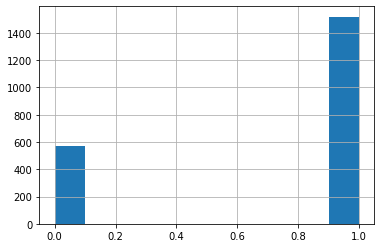

In [25]:
df_2_clean["Rating"].hist()

In [27]:
#POSITIVE VS NEGATIVE WORDS
# create dictionary list (positive)

dict_p = []
f = open('positive-words.txt', 'r')   
for line in f:
    t = line.strip().lower()
    if t is not None and len(t) > 0:
        dict_p.append(t)
f.close()

In [28]:
# create dictionary list (negative)

dict_n = []
f = open('negative-words.txt', 'r', encoding='ISO-8859-1') 
for line in f:
    t = line.strip().lower()
    if t is not None and len(t) > 0:
         dict_n.append(t)
f.close()

In [32]:
# Read data using pandas
user_cols=['Reviewers_Name','Rating','Review_Magazine','Review','Date']
df_count = pd.read_csv("Homework3.txt",sep="\t",header=None,names=user_cols)
df_count['Rating'] = df_count['Rating'].replace(['fresh','rotten'], [1,0])
df_count.Review=df_count.Review.astype(str)
df_count_drop_na=df_count.dropna()

In [33]:
reviews=df_count_drop_na[['Review']]

In [34]:
# count of positive and negative words that appeared in each message
# net count which is calculated by positive count subtracting negative count. 

poscnt = []
negcnt = []
netcnt = []

for nrow in range(0,len(reviews)):
    
    text = df_count_drop_na.Review[nrow].lower()
    qa = 0
    qb = 0

    for word in dict_p :
        if (word in text) :
            qa = qa + 1

    for word in dict_n :
        if (word in text) :
            qb = qb + 1

    qc = qa - qb
    
    poscnt.append(qa)
    negcnt.append(qb)
    netcnt.append(qc)

In [37]:
df_count_drop_na['poscnt'] = poscnt
df_count_drop_na['negcnt'] = negcnt
df_count_drop_na['netcnt'] = netcnt
df_count_drop_na[['Review','poscnt','negcnt','netcnt']]

,Review,poscnt,negcnt,netcnt
0,Martin Scorsese's Les Miserables.,0,3,-3
1,Gangs of New York is to Fernando Wood's Manhat...,1,2,-1
2,You simply have to applaud the magnitude and a...,3,0,3
3,One of the most provocative films from Hollywo...,1,1,0
4,Gangs of New York is one of those haunting fai...,2,8,-6
...,...,...,...,...
2084,Parasite conjures up images of a creature whic...,2,7,-5
2085,An exhilarating rollercoaster ride that keeps ...,3,3,0
2086,A masterpiece in storytelling. Parasite is a d...,2,7,-5
2087,"While it's hugely entertaining, Parasite is al...",3,3,0


In [38]:
result = []
pos=0
neg=0
net=0
for num in netcnt:
    if (num > 0):
        result.append('pos')
        pos+=1
    elif (num < 0):
        result.append('neg')
        neg+=1
    else:
        result.append('net')
        net+=1
        
result

['neg',
 'neg',
 'pos',
 'net',
 'neg',
 'pos',
 'neg',
 'neg',
 'net',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'neg',
 'neg',
 'net',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'net',
 'neg',
 'net',
 'net',
 'neg',
 'net',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'neg',
 'neg',
 'pos',
 'net',
 'net',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'net',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'net',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'net',
 'pos',
 'neg',
 'net',
 'neg',
 'net',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'net',
 'pos',
 'net',
 'pos',
 'net',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'pos',
 'neg',
 'neg',
 'pos',
 'net',
 'neg',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',


In [39]:
df_count_drop_na['result'] = result

In [40]:
df_count_drop_na[['Review','poscnt','negcnt','netcnt','result']]

,Review,poscnt,negcnt,netcnt,result
0,Martin Scorsese's Les Miserables.,0,3,-3,neg
1,Gangs of New York is to Fernando Wood's Manhat...,1,2,-1,neg
2,You simply have to applaud the magnitude and a...,3,0,3,pos
3,One of the most provocative films from Hollywo...,1,1,0,net
4,Gangs of New York is one of those haunting fai...,2,8,-6,neg
...,...,...,...,...,...
2084,Parasite conjures up images of a creature whic...,2,7,-5,neg
2085,An exhilarating rollercoaster ride that keeps ...,3,3,0,net
2086,A masterpiece in storytelling. Parasite is a d...,2,7,-5,neg
2087,"While it's hugely entertaining, Parasite is al...",3,3,0,net


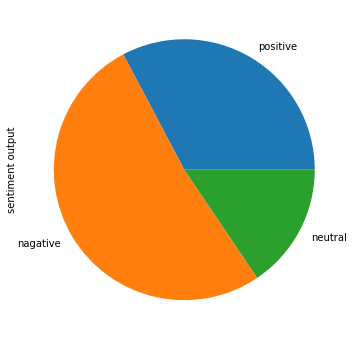

In [41]:
pie_label = ['positive', 'nagative', 'neutral']
series = pd.Series([pos,neg,net], 
                   index=pie_label, 
                   name='sentiment output')
series.plot.pie(figsize=(6, 6))

In [42]:
import matplotlib.pyplot as plt

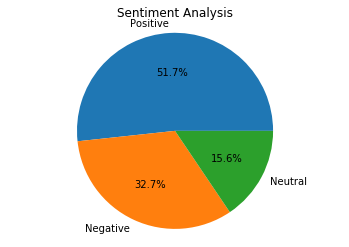

In [43]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = list(df_count_drop_na.result.value_counts())
fig = plt.figure()  
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.axis('equal')

plt.show()